# Исследование данных о российском кинопрокате

**Заказчик** — Министерство культуры Российской Федерации.

**Цель:** Изучить рынок российского кинопроката и выявить текущие тренды и ответить на вопрос насколько фильмы, которые получили государственную поддержку интересны зрителю.

**Входные данные:** данные, опубликованные на портале Министерства культуры и информация с сайта КиноПоиск о прокатных удостоверениях, сборах и государственной поддержке фильмов.

**Описание данных:**
* Данные `movies.csv` о прокатных удостоверениях: <br/>
`title` — название фильма <br/>`puNumber` — номер прокатного удостоверения <br/>`show_start_date` — дата премьеры фильма <br/>`type` — тип фильма <br/>`film_studio` — студия-производитель <br/>`production_country` — страна-производитель <br/>`director` — режиссёр <br/>`producer` — продюсер <br/>`age_restriction` — возрастная категория <br/>`refundable_support` — объём возвратных средств государственной поддержки <br/>`nonrefundable_support` — объём невозвратных средств государственной поддержки <br/>`financing_source` — источник государственного финансирования <br/>`budget` — общий бюджет фильма <br/>`ratings` — рейтинг фильма на КиноПоиске <br/>`genres` — жанр фильма
 <br/>  <br/>
* Данные `shows.csv` о показах фильмов в российских кинотеатрах: <br/>
`title` — название фильма <br/>`puNumber` — номер прокатного удостоверения <br/>`box_office` — сборы в рублях

<a id="enter"></a>
**Содержание:**

1. [Открытие файлов с данными и объедините их в один датафрейм](#start)
    * [1.1 Данные о прокатных удостоверениях](#movies)
    * [1.2 Данные о сборах прокатов в кинотеатрах](#shows)
    * [1.3 Объединенная таблица данных прокатных удостоверений и сборов](#merge)
2. [Предобработка данных](#preprocessing)
    * [2.1 Проверка типов данных](#type)
    * [2.2 Изучение пропусков в датафрейме](#null)
    * [2.3 Изучение дубликатов в датафрейме](#duplicates)
    * [2.4 Изучение категориальных значений](#duplicates)
    * [2.5 Проверка количественных значений](#kol)
    * [2.6 Добавление новых столбцов](#add)
3. [Исследовательский анализ данных](#science)
4. [Исследование фильмов, которые получили государственную поддержку](#fund)
4. [Общие выводы](#conclusion)

In [1]:
# импорт библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# функция для вывода информации
def info(a):
    display(a.head())
    a.info()

<a id='start'></a>
### Открытие файлов с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета прокатные удостоверения обязательно вошли в получившийся датафрейм. 

<a id='movies'></a>
#### Данные о прокатных удостоверениях

Итак, рассмотрим данные размещенные на портале министерства культуры и относящиеся к прокатным удостоверениям.

In [3]:
mkrf_movies = pd.read_csv('movies.csv')
info(mkrf_movies)

,Unnamed: 0,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7486 non-null   int64  
 1   title                  7486 non-null   object 
 2   puNumber               7485 non-null   float64
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

Датафрейм состоит из 7486 строк и 15 столбцов. Видно, что столбцы с названием фильма `title`, номером удостоверения `puNumber`, временем выхода в прокат `show_start_date`, типом фильма `tipe`, названием киностудии `film_studio`, и возрастной категорией `age_restriction` заполнены целиком. Столбцы с именами режисера `director`, продюсера `producer`, рейтингом `ratings` и жанром `genres` заполнены на 87-99,9%. А данные по бюджету и финансированию `budget`, `refundable_support`, `refundable_support` заполнены лишь частично (4,4%).

[к содержанию](#enter)

<a id='shows'></a>
#### Данные о сборах прокатов в кинотеатрах

Теперь с того же портала выгрузим данные о показах фильмов в кинотеатрах.

In [4]:
mkrf_shows = pd.read_csv('shows.csv')
info(mkrf_shows)

,Unnamed: 0,puNumber,box_office
0,0,111000113,2.450000e+03
1,1,111000115,6.104000e+04
2,2,111000116,1.530300e+08
3,3,111000117,1.226096e+07
4,4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3158 non-null   int64  
 1   puNumber    3158 non-null   int64  
 2   box_office  3158 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 74.1 KB


Датафрейм, как можно видеть, состоит из 3158 строк и 2х столбцов и не имеет пропусков.

[к содержанию](#enter)

<a id='merge'></a>
#### Объединенная таблица данных прокатных удостоверений и сборов

Перед тем как объединить по столбцу `puNumber` приведем его данные к общему типу

In [5]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors = 'coerce', downcast = "integer")
mkrf_shows['puNumber'] = pd.to_numeric(mkrf_shows['puNumber'], errors = 'coerce', downcast = "integer")

Создадим общий датафрейм с именем data путем присоединения к таблице `movies` (номера прокатных удостоверений) таблицы `shows` (кинопрокаты) по столбцу с номерами прокатов `puNumber`.

In [6]:
data=mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

[к содержанию](#enter)

<a id='preprocessing'></a>
### Предобработка данных

<a id='type'></a>
#### Проверка типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Итак, вот объединенная таблица, включающая полностью датафрейм с прокатными удостоврениями и столбец из таблицы показов с кассовыми сборами в рублях.

In [7]:
info(data)

,Unnamed: 0_x,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,Unnamed: 0_y,box_office
0,0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN
1,1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN
2,2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
3,3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
4,4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x           7486 non-null   int64  
 1   title                  7486 non-null   object 
 2   puNumber               7485 non-null   float64
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

Общий датафрей включает 2 типа форматов данных (object - смешанный и float64 - десятичные дроби).

Можно видеть, что в целом формат соответствует составу, за исключением столбца `show_start_date` который содержит дату и время и должен иметь тип datetime64. Исправим это:

In [8]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

[к содержанию](#enter)

<a id='null'></a>
#### Изучение пропусков в датафрейме

In [9]:
info(data)

,Unnamed: 0_x,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,Unnamed: 0_y,box_office
0,0,Открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN
1,1,Особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN
2,2,Особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
3,3,Особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
4,4,Особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0_x           7486 non-null   int64              
 1   title                  7486 non-null   object             
 2   puNumber               7485 non-null   float64            
 3   show_start_date        7486 non-null   datetime64[ns, UTC]
 4   type                   7486 non-null   object             
 5   film_studio            7468 non-null   object             
 6   production_country     7484 non-null   object             
 7   director               7477 non-null   object             
 8   producer               6918 non-null   object             
 9   age_restriction        7486 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Рассмотрим пропуски. Столбцы перечисленные выше, где количество данных от 87 до 99,9% имеют пропуски не преднамеренные, а скорее технические. Информация в них в основном текстовая (имя режиссера, продюсера и т.д.) и вряд ли может быть восполнена.
Новый столбец с кассовыми сборами `box_office` больше чем наполовину пуст поскольку не все кинотеатры предоставляют данне для официального портала.  Столбцы где указаны размеры бюджета и финансирования (`budget`, `refundable_support`, `nonrefundable_support`) имеют одинаковое число заполненных строк (332), что очевидно не случайно. Ведь расходы на картины снятые при поддержке госудаства должны быть официально оформлены и отражены в соответсвующих статьях.

[к содержанию](#enter)

<a id='duplicates'></a>
#### Изучение дубликатов в датафрейме

Для начала, проверим есть ли в таблице явные  дубликаты:

In [10]:
data.duplicated().unique().sum()

0

Явных дубликатов нет, а чтобы выявить неявные изучим отдельно категориалые значения.

[к содержанию](#enter)

<a id='category'></a>
#### Изучение категориальных значений

* Столбец `type`

Итак, рассмотрим уникальные значения в столбце `type`

In [11]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В списке видно что имеется 2 пары неявных дубликатов, отличающихся только пробелом. Исправим это:

In [12]:
data['type']=data['type'].str.strip()

In [13]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь все в порядке, перейдем с слудующему 'production_country' (страна-производитель). Поскольку уникальных значений много, выведем только их количество, затем удалим пропуски и сравним число уникальных значений.

* Столбец `production_country`

In [14]:
data['production_country'].value_counts().count()

950

In [15]:
data['production_country']=data['production_country'].str.strip()
data['production_country'].value_counts().count()

934

Вот и ещё 16 (1,7%) неявных дубликатов ушло.

* Столбец `film_studio`

In [16]:
data['film_studio'].value_counts().count()

5490

In [17]:
data['film_studio']=data['film_studio'].str.strip()
data['film_studio'].value_counts().count()

5462

Столбец сократился на 28 (0,5%) дубликатов.

* Столбец `producer`

In [18]:
data['producer'].value_counts().count()

5349

In [19]:
data['producer']=data['producer'].str.strip()
data['producer'].value_counts().count()

5334

Вот и минус 15 строк в столбце продюсеров

* Столбец `director`

In [20]:
data['director'].value_counts().count()

4811

In [21]:
data['director']=data['director'].str.strip()
data['director'].value_counts().count()

4801

Вот и режиссеры ужались на 10 строк.

* Столбец `ratings`

In [22]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Как видно, в столбце рейтинга очень разнообразные данные, обработаем их в единый формат:

In [23]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce') 

In [24]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

Теперь, как мне кажется, столбец выглядит более унифицированно и можно на этом остановиться.

[к содержанию](#enter)

<a id='kol'></a>
#### Проверка количественных значений

В таблице имеются следующие столбцы с колличественными значениями - `budget`, `refundable_support`, `nonrefundable_support`, `box_office`.

* Столбцы `budget`, `refundable_support`, `nonrefundable_support`

Очевидно, что общий бюджет не может быть ниже размеров государственного финансирования. Проверим это:

In [25]:
display(data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support']), ['budget', 'refundable_support', 'nonrefundable_support']])
print('Число строк с бюджетом меньше чем господдержка:', data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support']),'budget'].count())

,budget,refundable_support,nonrefundable_support
2053,0.0,0.0,23000000.0
2058,0.0,0.0,75000000.0
2472,0.0,10000000.0,70000000.0
2532,0.0,20000000.0,0.0
2615,0.0,60000000.0,100000000.0
2684,0.0,0.0,59000000.0
2788,0.0,0.0,35000000.0
2874,0.0,0.0,6000000.0
3047,0.0,19000000.0,51000000.0
3565,0.0,0.0,250000000.0


Число строк с бюджетом меньше чем господдержка: 17


Итак, в столбце бюджета 17 неправильных строк, исправим их на сумму столбцов с государственной поддержкой.

In [26]:
data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support']),'budget'] = data['refundable_support'] + data['nonrefundable_support']
print('Число строк с бюджетом меньше чем господдержка:', data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support']),'budget'].count())

Число строк с бюджетом меньше чем господдержка: 0


Теперь с бюджетом порядок, перейдем к столбцу кассовых сборов.

* Столбец `box_office`

In [27]:
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(data['box_office'].describe())

count           3,158
mean       76,478,696
std       240,353,123
min                 0
25%            86,239
50%         2,327,988
75%        23,979,671
max     3,073,568,691
Name: box_office, dtype: float64

<AxesSubplot:>

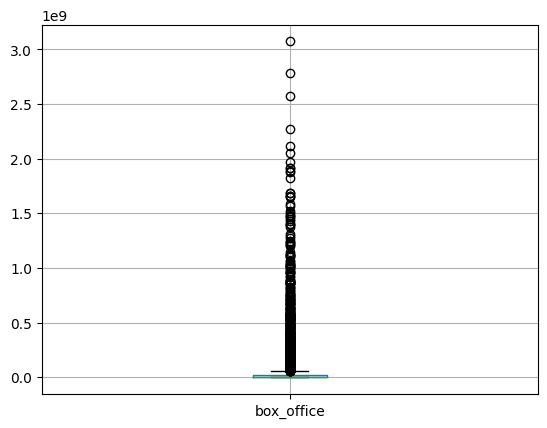

In [28]:
data[['box_office']].boxplot()

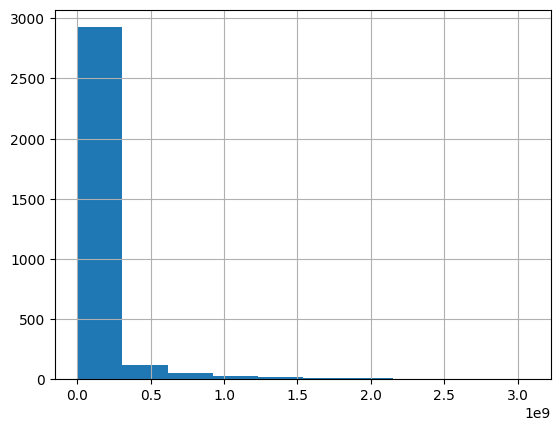

In [29]:
data['box_office'].hist();

Как видно из-за большого разброса между минимумом и максимумом (~3 млрд.), стандартное отклонение на порядок больше среднего, а среднее в 10 раз выше медианы. Сборы в основном сосредоточены в области до 300 млн. На этой стадии, мне сложно решить что с этим делать и поэтому я оставила столбец как есть. 

[к содержанию](#enter)

<a id='add'></a>
#### Добавление новых столбцов

- Создадим столбец `year` с информацией о годе проката. Выделите год из даты премьеры фильма.

In [30]:
data['year'] = data['show_start_date'].dt.year

* Создадим два столбца: с именем и фамилией главного режиссёра `dir_name` и основным жанром фильма `genre_1`. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [31]:
def out(row):
    col = row.str.split(',').str.get(0)
    return col
data[['dir_name','genre_1']]=data[['director','genres']].apply(out)

* Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка и добавим эти данные столбцом `gos_support` в общую таблицу.

In [32]:
data['gos_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
display(data['gos_support'].sort_values().head())
display(data.query('gos_support>0')['gos_support'].sort_values().tail(20))

5600    0.044043
3732    0.066461
7171    0.076929
7180    0.090909
3042    0.100232
Name: gos_support, dtype: float64

1448    0.700000
2538    0.700000
3385    0.784745
2684    1.000000
2053    1.000000
3675    1.000000
2058    1.000000
3565    1.000000
2472    1.000000
6008    1.000000
6823    1.000000
2532    1.000000
5673    1.000000
5806    1.000000
2874    1.000000
6323    1.000000
2615    1.000000
2788    1.000000
3047    1.000000
3739    1.000000
Name: gos_support, dtype: float64

Итак, доля государственной поддержки от общего бюджета фильма составляет от 4,4 до 78,5 %, а там где были заменены нули в бюджете - поддержка 100%.

[к содержанию](#enter)

<a id='science'></a>
### Исследовательский анализ данных

Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Для начала найдем общее число выходов фильмов за каждый год

In [33]:
total_year_shows = data.groupby('year').agg({'title':'count'})
total_year_shows.columns = ['total_show_number']
total_year_shows = total_year_shows.reset_index()
display(total_year_shows)
print('Общее число фильмов, вышедших с 2010 по 2019 г.:', total_year_shows['total_show_number'].sum())

,year,total_show_number
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,807
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


Общее число фильмов, вышедших с 2010 по 2019 г.: 7486


Видно, что наибольшее число фильмов (985 - 13,2%) вышло в 2010 году, наименьшее (505- 6,7%) - в 2017

Теперь найдем число выходов фильмов с указанной информацией и соотношение фильмов с известной информацией к общему колличеству.

In [34]:
year_cinema_shows = data.query('box_office > 0').groupby('year').agg({'title':'count'})
year_cinema_shows.columns = ['show_number']
year_cinema_shows=year_cinema_shows.reset_index()
year_cinema_shows['total_show_number'] = total_year_shows['total_show_number']
year_cinema_shows['cinema_show_rate'] = year_cinema_shows['show_number'] / year_cinema_shows['total_show_number']
display(year_cinema_shows)
print(
    'Общая доля выходов фильмов с известной информацией к общему колличеству фильмов с 2010 по 2019 г.',
    (year_cinema_shows['show_number'].sum() / total_year_shows['total_show_number'].sum()).round(3)
)

,year,show_number,total_show_number,cinema_show_rate
0,2010,101,985,0.102538
1,2011,109,622,0.175241
2,2012,123,593,0.207420
3,2013,179,630,0.284127
4,2014,273,807,0.338290
5,2015,462,705,0.655319
6,2016,525,818,0.641809
7,2017,357,505,0.706931
8,2018,475,891,0.533109
9,2019,530,930,0.569892


Общая доля выходов фильмов с известной информацией к общему колличеству фильмов с 2010 по 2019 г. 0.419


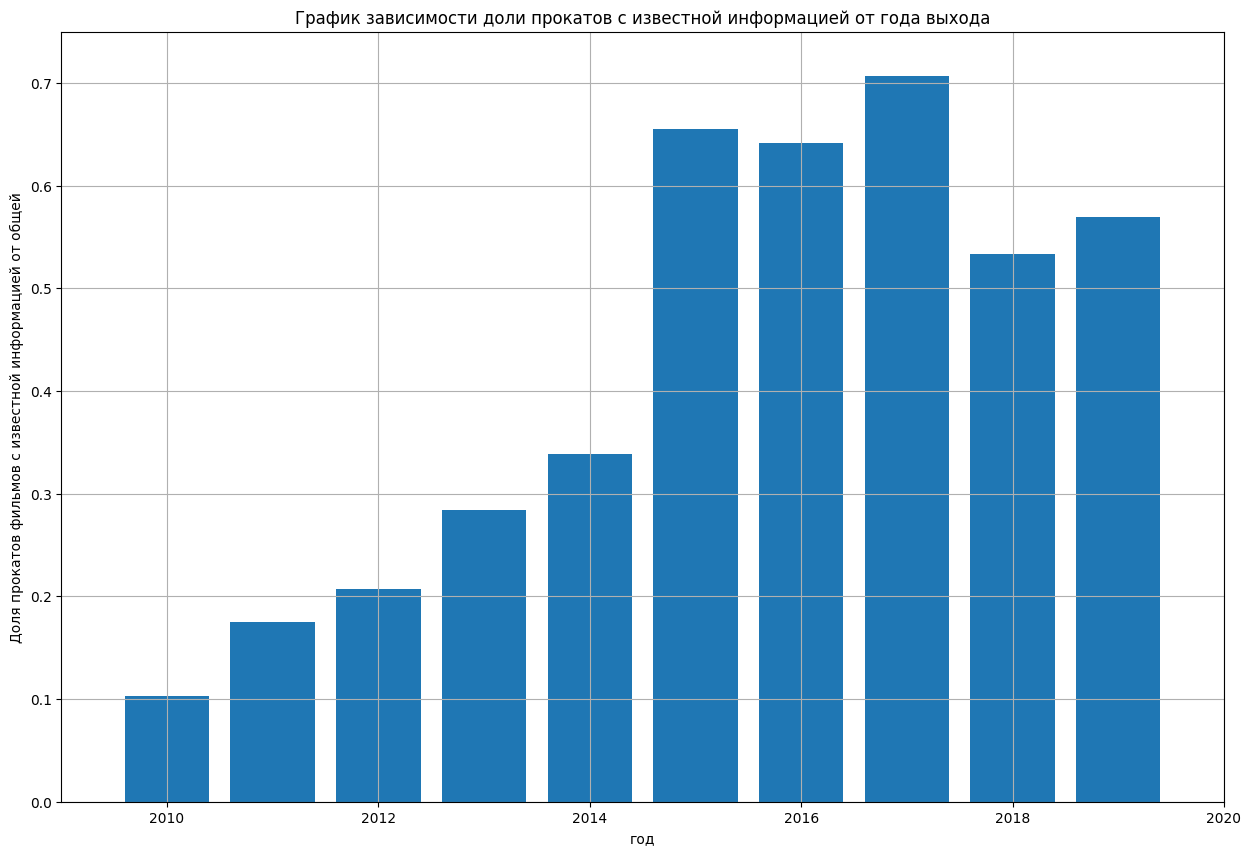

In [35]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(year_cinema_shows['year'], year_cinema_shows['cinema_show_rate']);
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlim([2009, 2020])
ax.set_ylim([0, 0.75])
ax.grid(which = 'major')
ax.grid(which = 'minor')
ax.set_title('График зависимости доли прокатов с известной информацией от года выхода')
ax.set_xlabel('год');
ax.set_ylabel('Доля прокатов фильмов с известной информацией от общей');

In [36]:
data.groupby('year').agg({'box_office' : lambda x : (x.isna() == False).mean()})

,box_office
year,
2010,0.106599
2011,0.175241
2012,0.215852
2013,0.292063
2014,0.345725
2015,0.659574
2016,0.643032
2017,0.706931
2018,0.533109


Итак, в период с 2010 по 2014 год доля фильмов по которым есть данные о показах заполнены от 10,7 до 34,6%.  с 2015 до 2019 годы информации больше и доля известных строк от 53 до 71%. Таким образом, наиболее полно представлен 2017 год (71%), наименее - 2010(10,7%).

- Изучим, как менялась динамика проката по годам, в каком году сумма сборов была минимальной и максимальной.

In [37]:
year_collection = data.query('box_office > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
year_collection = year_collection.reset_index()
year_collection.columns = ['year', 'sum_collection']
year_collection['sum_collection'] /= 1000000
display(year_collection)
print('Общий сбор от проката с 2010 по 2019 г.:',year_collection['sum_collection'].sum().round(0) ,'млн.руб.')

,year,sum_collection
0,2010,2.428654
1,2011,14.102765
2,2012,6.955423
3,2013,29.799706
4,2014,7444.951859
5,2015,39497.365196
6,2016,47866.299742
7,2017,48563.707218
8,2018,49668.403134
9,2019,48425.708780


Общий сбор от проката с 2010 по 2019 г.: 241520.0 млн.руб.


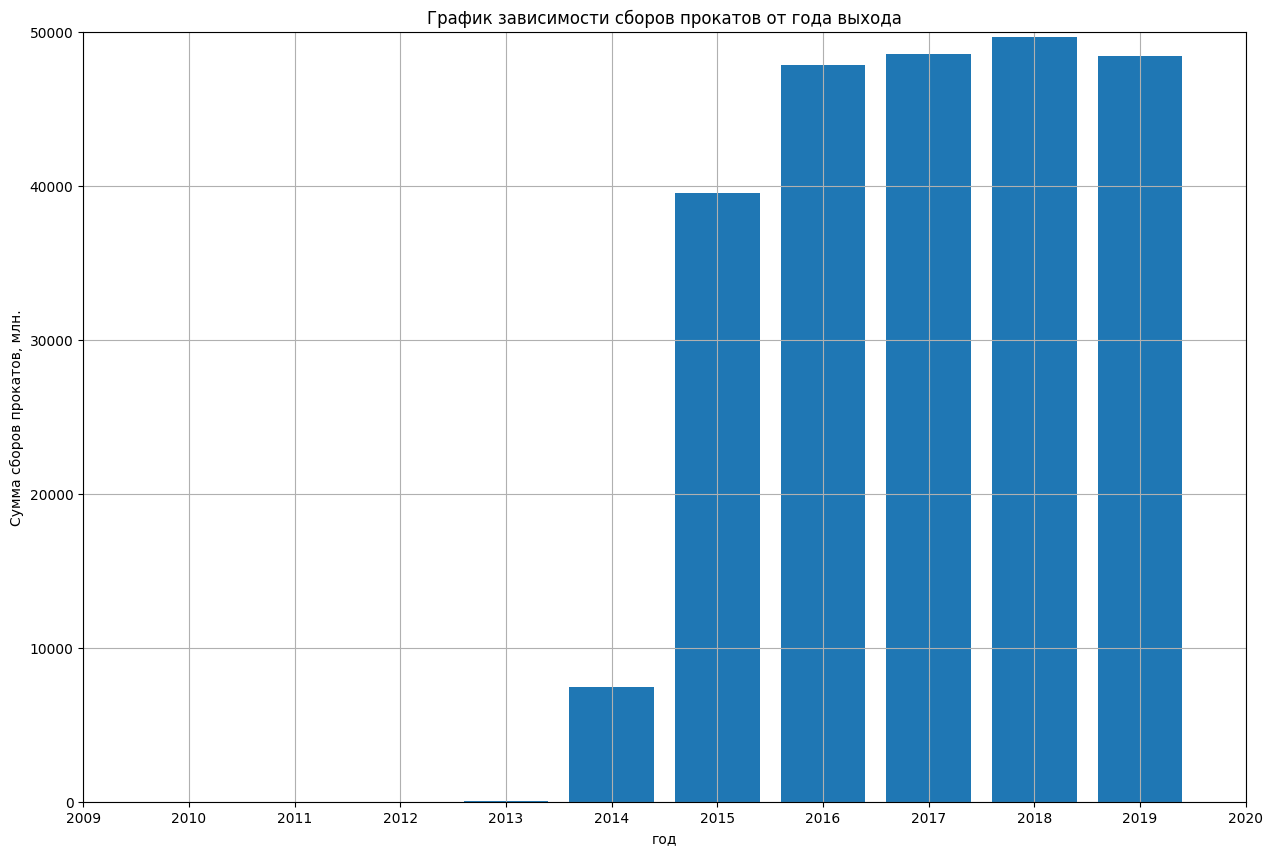

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(year_collection['year'], year_collection['sum_collection']);
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlim([2009, 2020])
ax.set_ylim([0, 50000])
ax.grid(which='major')
ax.set(title='График зависимости сборов прокатов от года выхода', xlabel='год', ylabel='Сумма сборов прокатов, млн.');

Конечно, по частично заполненным столбцам судить о сборах некорректно (минимум 2,4 млн. 2010 году особенно резко выделяется на фоне более представительных периодов 2015-2019 годы). Поэтому если отбросить данные до 2015 года, то минимум будет на уровне 39497 млн (2015 год), а максимум - 49668 млн. (2018 год).

* С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [39]:
aver_year_collect = data.query('box_office>0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
aver_year_collect = aver_year_collect.reset_index()
aver_year_collect.columns = ['year', 'mean_collect', 'mediam_collect']
display(aver_year_collect)

,year,mean_collect,mediam_collect
0,2010,2.404608e+04,1710.000
1,2011,1.293832e+05,3000.000
2,2012,5.654815e+04,6220.000
3,2013,1.664788e+05,3580.000
4,2014,2.727089e+07,20400.000
5,2015,8.549213e+07,5003450.150
6,2016,9.117390e+07,3915041.020
7,2017,1.360328e+08,9968340.000
8,2018,1.045651e+08,8891102.210
9,2019,9.136926e+07,4627798.345


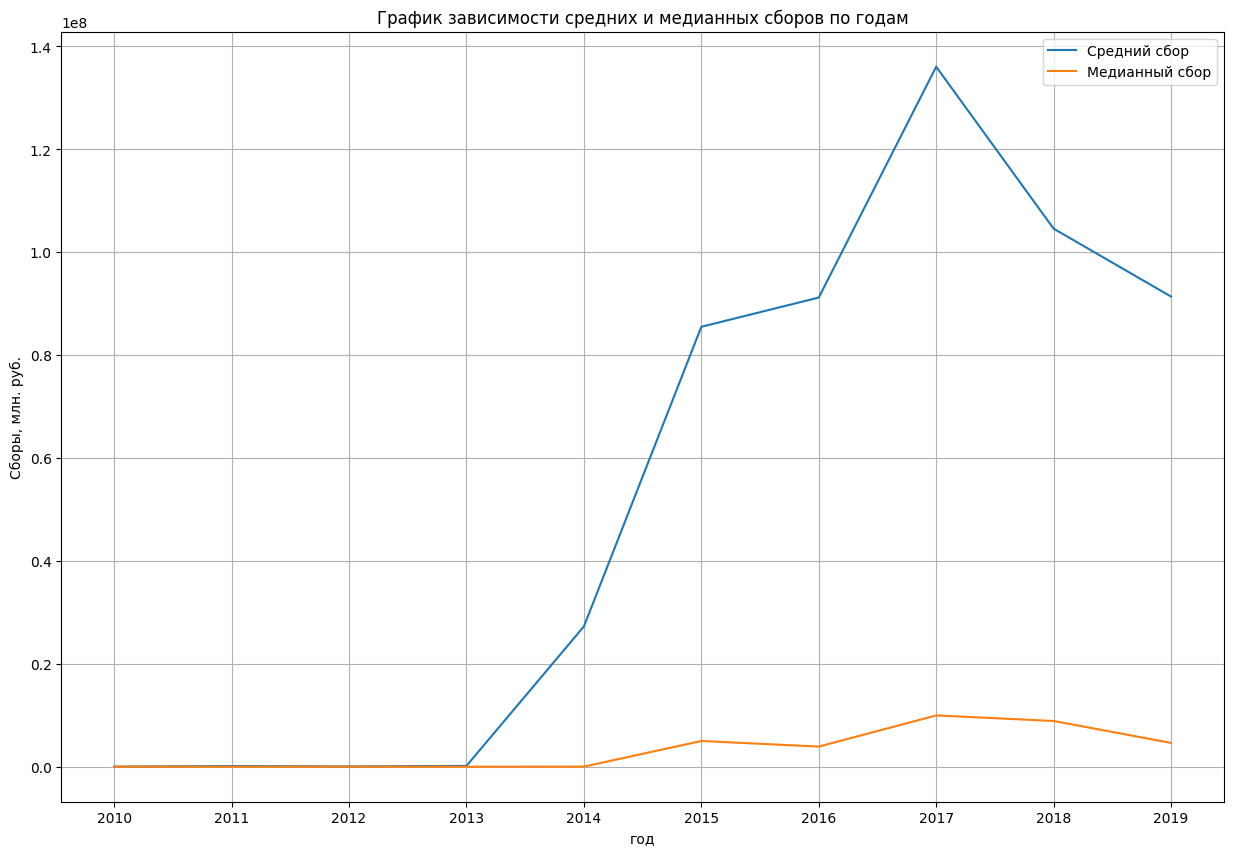

In [40]:
ax = aver_year_collect.set_index('year').plot(figsize=(15,10));
ax.grid(which='major')
ax.set(title='График зависимости средних и медианных сборов по годам', xlabel='год', ylabel='Сборы, млн. руб.')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(['Средний сбор','Медианный сбор']);

Как видно из таблицы и графика, наблюдается cущественное расхождение между средними значениями и медианами, что говорит о влиянии максимальных значений. Так, минимальные сборы наблюдаются в 2010 году (среднее - 24046 р., медиана - 1710 р.), максимальные относятся к 2017 г. (среднее - 136 млн. р., медиана - 9,97 млн. р.).

[к содержанию](#enter)

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [41]:
display(data.query('year>=2015 and year<=2019 and box_office>0').pivot_table(
    index=['year','age_restriction'], values='box_office', aggfunc='sum'
))

box_office
year age_restriction                                     
2015 «0+» - для любой зрительской аудитории  3.790546e+08
     «12+» - для детей старше 12 лет         1.361608e+10
     «16+» - для детей старше 16 лет         1.136812e+10
     «18+» - запрещено для детей             5.432308e+09
     «6+» - для детей старше 6 лет           8.701799e+09
2016 «0+» - для любой зрительской аудитории  1.502288e+08
     «12+» - для детей старше 12 лет         1.220445e+10
     «16+» - для детей старше 16 лет         1.666455e+10
     «18+» - запрещено для детей             6.793930e+09
     «6+» - для детей старше 6 лет           1.205315e+10
2017 «0+» - для любой зрительской аудитории  2.295989e+08
     «12+» - для детей старше 12 лет         7.851428e+09
     «16+» - для детей старше 16 лет         1.874504e+10
     «18+» - запрещено для детей             9.651496e+09
     «6+» - для детей старше 6 лет           1.208614e+10
2018 «0+» - для любой зрительской аудитории  3.244900e+07
     «12+» - для детей старше 12 лет         1.426729e+10
     «16+» - для детей старше 16 лет         1.650360e+10
     «18+» - запрещено для детей             8.760086e+09
     «6+» - для детей старше 6 лет           1.010497e+10
2019 «0+» - для любой зрительской аудитории  1.774607e+07
     «12+» - для детей старше 12 лет         1.268020e+10
     «16+» - для детей старше 16 лет         1.275342e+10
     «18+» - запрещено для детей             1.012180e+10
     «6+» - для детей старше 6 лет           1.285255e+10

Как видно из таблицы, сборы зависят не только от времени выхода фильма, но и от возрастного ограничения. 
Для рассматриваемого промежутка времени общим является то, что минимум сборов находится в категории 0+ и составляет от 17,7 до 379 млн (малышей реже водят в кинотеатры). Максимум же зависит от года. Так, в 2015 максимум (13616 млн.) находится в категории 12+, а в 2016 - 2018 максимум смещается к категории 16+ (16665, 18745 и 16504 млн.) - более взрослая молодежь чаще ходит в кино. В 2019 году наибольшие сборы имеет категория 6+ (12853 млн.) - видимо в прокат вышли мультфильмы интересные не только детям, но и более старшим. Рассмотрим теперь общие сборы по категориям возрастных ограничений в период с 2015 по 2019 год.

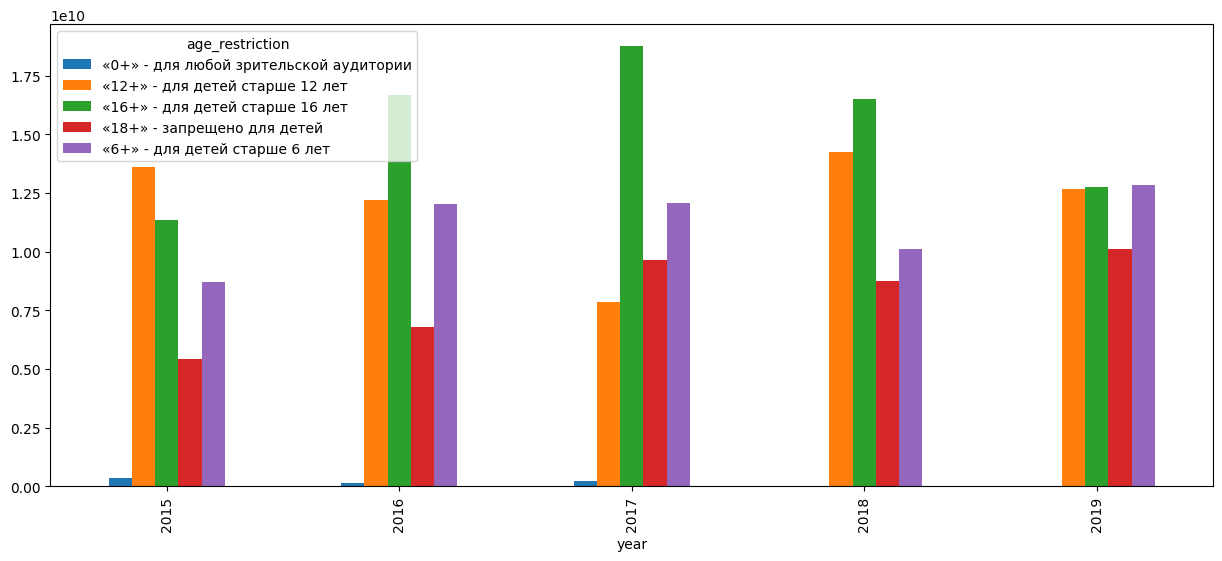

In [42]:
data.query('year>=2015 and year<=2019 and box_office>0').pivot_table(
    index='year', columns='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(15,6));

In [43]:
display(data.query('year>=2015 and year<=2019 and box_office>0').pivot_table(
    index='age_restriction', values='box_office', aggfunc='sum'
))

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,8.090774e+08
«12+» - для детей старше 12 лет,6.061945e+10
«16+» - для детей старше 16 лет,7.603473e+10
«18+» - запрещено для детей,4.075962e+10
«6+» - для детей старше 6 лет,5.579861e+10


Итак, наибольшие сборы у фильмов 16+ - 76034 млн., наверное потому что такие фильмы вызывают интерес не только у молодежи, но и у тех кто старше. Наименьшие сборы в категории 0+ - 809 млн.

[к содержанию](#enter)

<a id='fund'></a>
### Исследование фильмов, которые получили государственную поддержку

Определим закономерности в данных и посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Чтобы оценить есть ли зависимость между окупаемостью и государственной поддержкой создадим таблицу где выбраны строки с ненулевым столбцами `refundable_support` и `nonrefundable_support`.

In [44]:
budget_collection=data.query('refundable_support>0 or nonrefundable_support>0')[['year','title','genre_1','dir_name','budget', 'refundable_support', 'nonrefundable_support', 'box_office','ratings']]
budget_collection['support_mln']=(budget_collection['refundable_support']+budget_collection['nonrefundable_support'])/1000000
budget_collection['income_mln']=(budget_collection['box_office']-budget_collection['budget'])/1000000
budget_collection[['budget_mln', 'box_office_mln']]=budget_collection[['budget', 'box_office']]/1000000
budget_collection=budget_collection[['year','title','genre_1','dir_name','budget_mln', 'support_mln','box_office_mln', 'income_mln', 'ratings']]
display(budget_collection)

,year,title,genre_1,dir_name,budget_mln,support_mln,box_office_mln,income_mln,ratings
1281,2013,Пока еще жива,драма,А.Атанесян,79.411900,26.500000,0.365354,-79.046546,8.1
1448,2014,Бесславные придурки,NaN,А.Якимчук,37.142857,26.000000,0.028140,-37.114717,NaN
1498,2013,Невидимки,комедия,Р.Давлетьяров,176.023490,107.847945,19.957031,-156.066459,5.3
1524,2014,БЕРЦЫ,драма,Е.Миндадзе (псевдоним Катя Шагалова),40.574140,28.000000,0.055918,-40.518223,4.2
1792,2014,Братья Ч,драма,М.Угаров,40.015122,25.000000,0.232100,-39.783022,6.4
...,...,...,...,...,...,...,...,...,...
7464,2019,Союз спасения,история,А.Кравчук,980.000000,500.000000,717.703186,-262.296814,6.0
7466,2019,Иван Царевич и Серый Волк 4,мультфильм,Д.Шмидт,190.000000,100.000000,501.069235,311.069235,6.7
7474,2019,Вторжение,фантастика,Ф.Бондарчук,944.000000,500.000000,NaN,NaN,5.7
7476,2019,Я свободен,драма,И.Северов,46.154000,30.000000,NaN,NaN,5.9


In [45]:
print('Суммарная государственная поддержка:', budget_collection['support_mln'].sum().round(0),'млн.рублей')

Суммарная государственная поддержка: 20201.0 млн.рублей


Итак всего 332 фильма получили поддержку государства на общую сумму 20201 млн. рублей. Построим для них график распределения сборов и бюджетов по годам.

In [46]:
budget_sup_year=budget_collection.pivot_table(index='year', values=['budget_mln','support_mln', 'box_office_mln'], aggfunc='sum').reset_index()

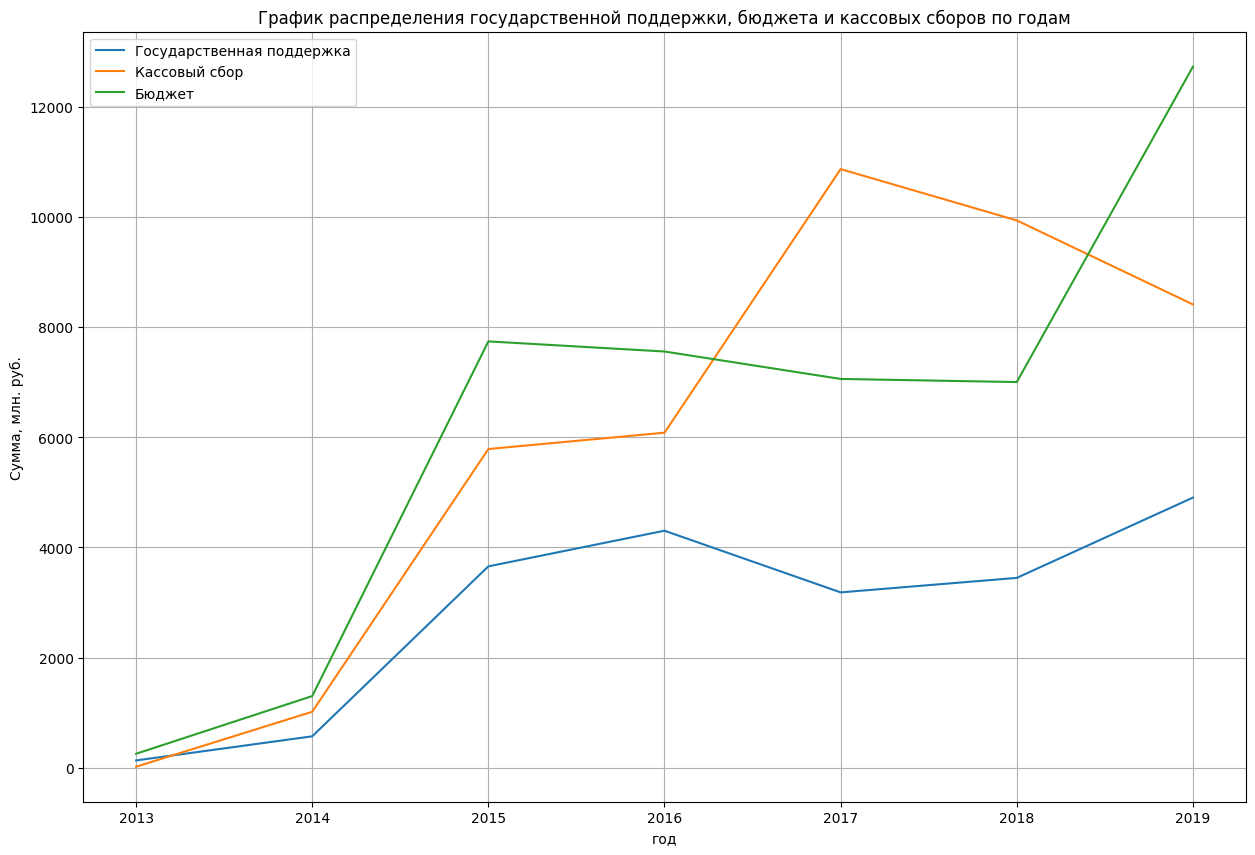

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(budget_sup_year['year'], budget_sup_year['support_mln'], label="Государственная поддержка");
ax.plot(budget_sup_year['year'], budget_sup_year['box_office_mln'], label="Кассовый сбор");
ax.plot(budget_sup_year['year'], budget_sup_year['budget_mln'], label="Бюджет");
fig.set_figwidth(15)
fig.set_figheight(10)
ax.grid(which='major')
ax.set_title('График распределения государственной поддержки, бюджета и кассовых сборов по годам')
ax.set_xlabel('год');
ax.set_ylabel('Сумма, млн. руб.');
plt.legend();

Недозаполненность строк в кассовых сборах не могла не повлиять и на характер этих графиков. Если не рассматривать данные до 2015 года, то после него и до 2016 год период можно назвать убыточным для кинематографа (кассовые сборы ниже бюджета). 2017-2018 годы - прибыльные (максимум сборов ~ 10800 млн. в 2017). 2019 год вновь убыточный, хотя государственная поддержка выше чем в 2017 и 2018 годы. То же можно сказать о 2015 и 2016 годах. Получается чем выше поддержка тем хуже результат?! Киностудии, которые знают что не на кого рассчитывать больше стараются снять хорошее кино?! Впрочем... это не лишено смысла, в кино как и в жизни такие же законы, тепличные культуры например меньше приспособлены к большим  колебаниям температур.

Рассмотрим теперь какой рейтинг у фильмов имеющих наибольшую государственную поддержку

In [48]:
ratings_support=budget_collection.pivot_table(index='ratings', values='support_mln', aggfunc='sum').reset_index()

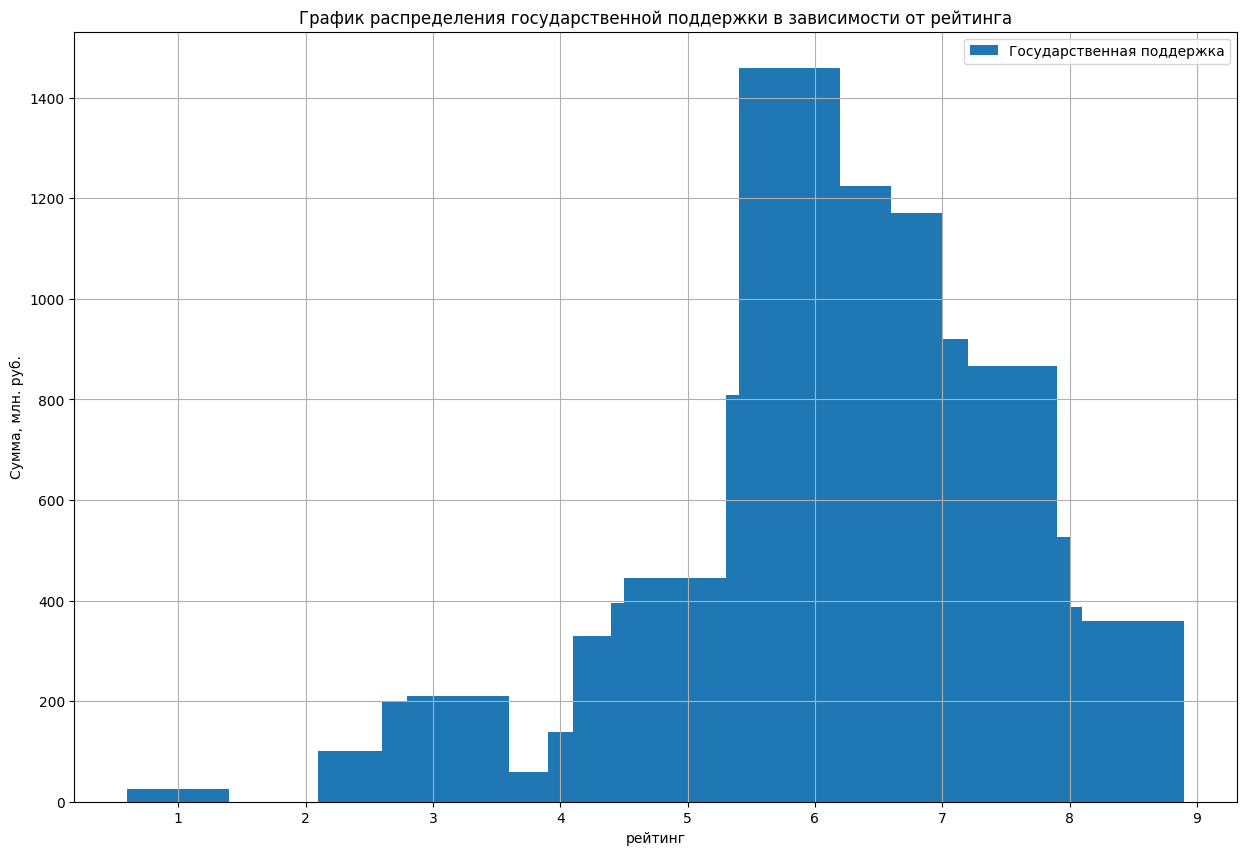

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(ratings_support['ratings'], ratings_support['support_mln'], label="Государственная поддержка");
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(10)
ax.grid(which='major')
ax.set_title('График распределения государственной поддержки в зависимости от рейтинга')
ax.set_xlabel('рейтинг');
ax.set_ylabel('Сумма, млн. руб.');
plt.legend();

График говорит о том, что фильмы у которых рейтинг 5,5-6,2 имеют максимальную государственную поддержку (1460 млн. - 7,2%), у рейтинга 6,2-6,6 - 1220 млн (6%), у рейтинга 6,6-7 1170 млн. (5,8%) и т.д.

In [50]:
budget_collection.groupby(pd.cut(budget_collection['ratings'], bins=10)).agg({'support_mln' : 'sum'})

,support_mln
ratings,
"(0.992, 1.75]",25.000000
"(1.75, 2.5]",100.000000
"(2.5, 3.25]",560.123915
"(3.25, 4.0]",196.000000
"(4.0, 4.75]",897.500000
"(4.75, 5.5]",2499.637945
"(5.5, 6.25]",5715.803119
"(6.25, 7.0]",5755.913450
"(7.0, 7.75]",2754.193537


Посмотрим фильмы с каким рейтингом лучше окупаются

In [51]:
support_return=budget_collection.pivot_table(index='ratings', values='income_mln', aggfunc='sum').reset_index()

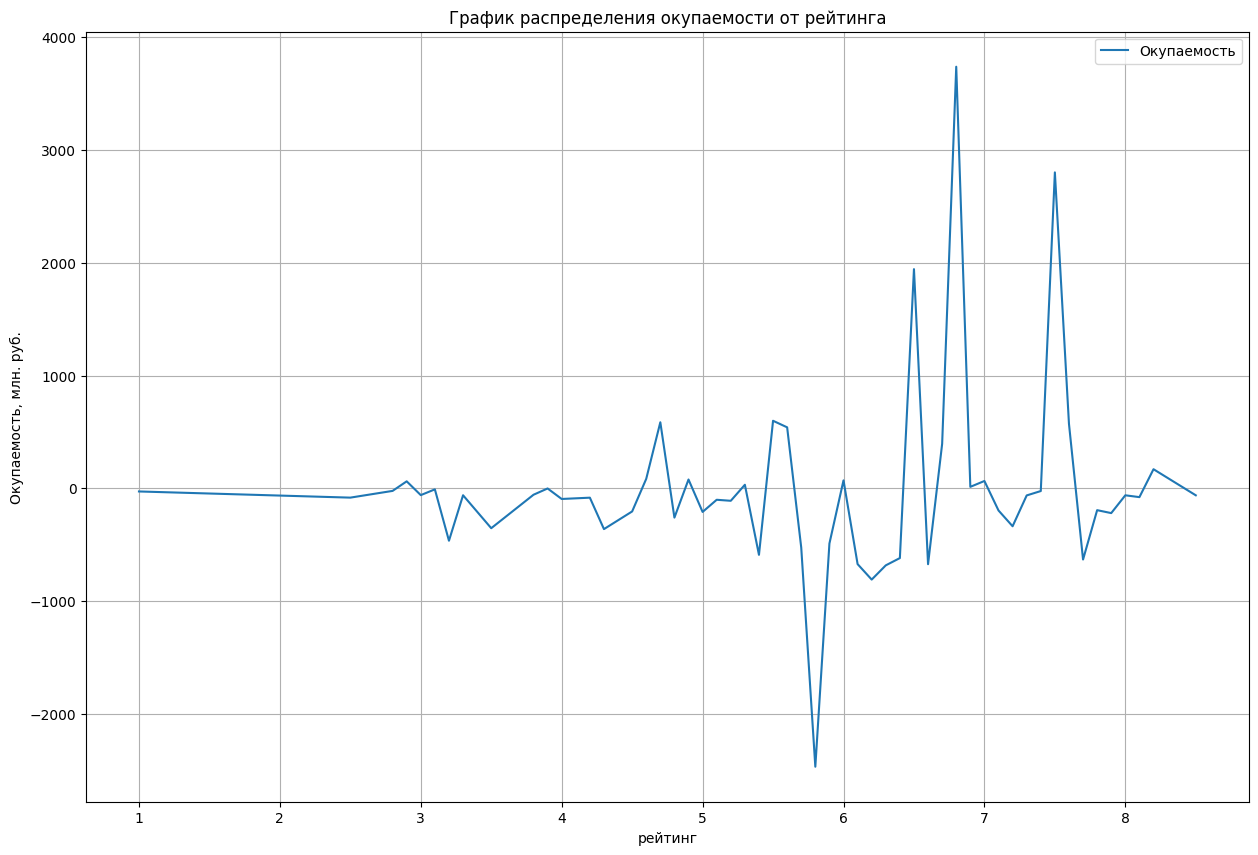

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(support_return['ratings'], support_return['income_mln'], label="Окупаемость");
fig.set_figwidth(15)
fig.set_figheight(10)
ax.grid(which='major')
ax.set_title('График распределения окупаемости от рейтинга')
ax.set_xlabel('рейтинг');
ax.set_ylabel('Окупаемость, млн. руб.');
plt.legend();

Итак, фильмы наиболее поддерживаемые государством ещё не гарантируют окупаемость, если рейтинги 5,5-5,6 хоть как-то окупаются, то 5,8 - самые убыточные. Максимальная окупаемость у рейтинга 6,8 - 3750 млн., далее 7,5 - 2800 млн.

In [53]:
genre_return=budget_collection.pivot_table(index='genre_1', values=['income_mln'], aggfunc='sum').reset_index()

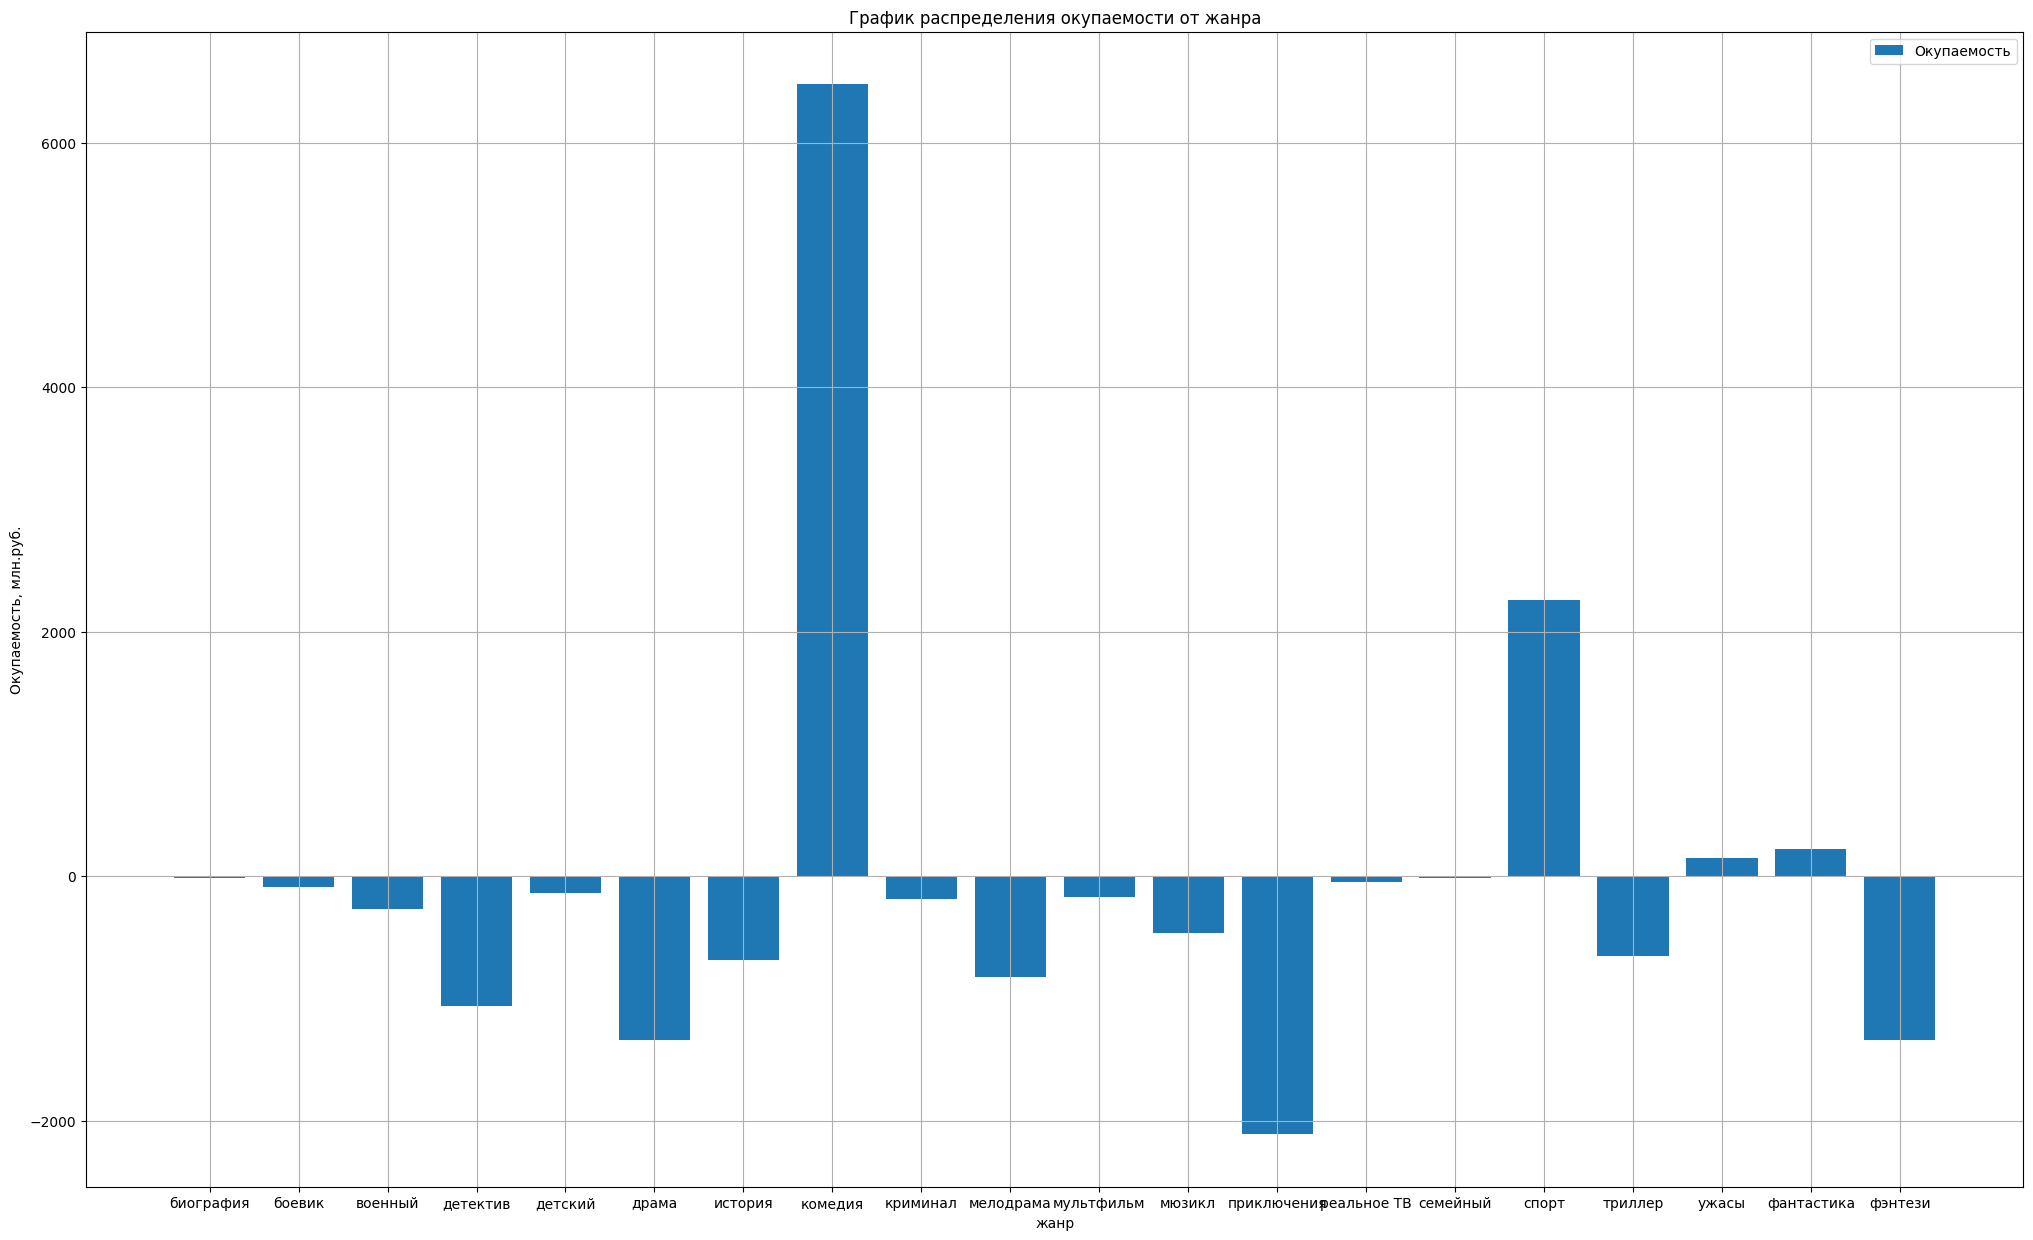

In [54]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(genre_return['genre_1'], genre_return['income_mln'], label="Окупаемость")
fig.set_figwidth(25)
fig.set_figheight(15)
ax.grid(which='major')
ax.set_title('График распределения окупаемости от жанра')
ax.set_xlabel('жанр');
ax.set_ylabel('Окупаемость, млн.руб.')
plt.legend();

Таким образом, на графике хорошо видно какой жанр считается наиболее выгодным для киноиндустрии - это комедия (6500 млн.руб.), 2300 млн. - окупаемость жанра спорт, около 200 млн. - ужасы и фантастика, остальные - убыточные. Самый убыточный жанр среди всех - приключения.
Посмотрим как распределяется по жанрам государственная поддержка.

In [55]:
genre_support=budget_collection.pivot_table(index='genre_1', values=['support_mln'], aggfunc='sum').reset_index()

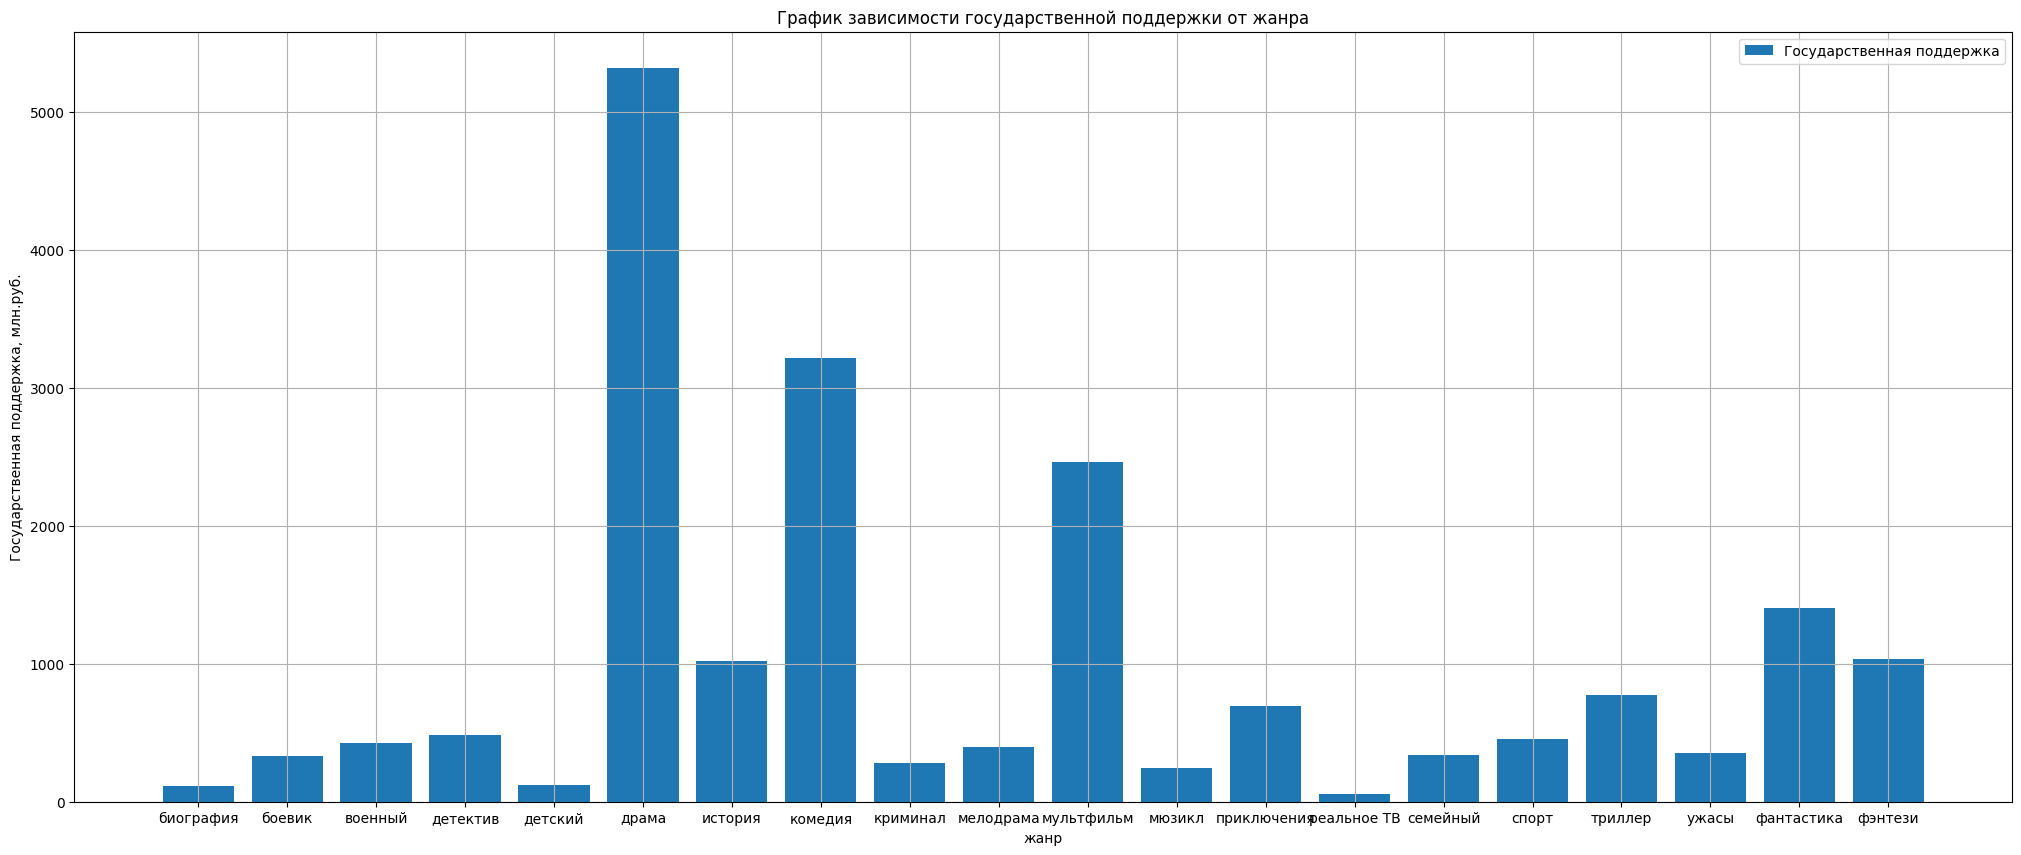

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(genre_support['genre_1'], genre_support['support_mln'], label="Государственная поддержка")
fig.set_figwidth(25)
fig.set_figheight(10)
ax.grid(which='major')
ax.set_title('График зависимости государственной поддержки от жанра')
ax.set_xlabel('жанр');
ax.set_ylabel('Государственная поддержка, млн.руб.')
plt.legend();

Итак наибольшей поддержки от государства удостаиваются убыточные драмы (5300 млн.), а уж потом прибыльные комедии (3200 млн.). Мультфильмы тоже неплохо поддерживаются (2450 млн.). Меньше всего помощи у реального ТВ. Посмотрим как рейтинги распределяются по жанрам.

In [57]:
genre_rating=budget_collection.pivot_table(index='genre_1', values=['ratings']).reset_index()

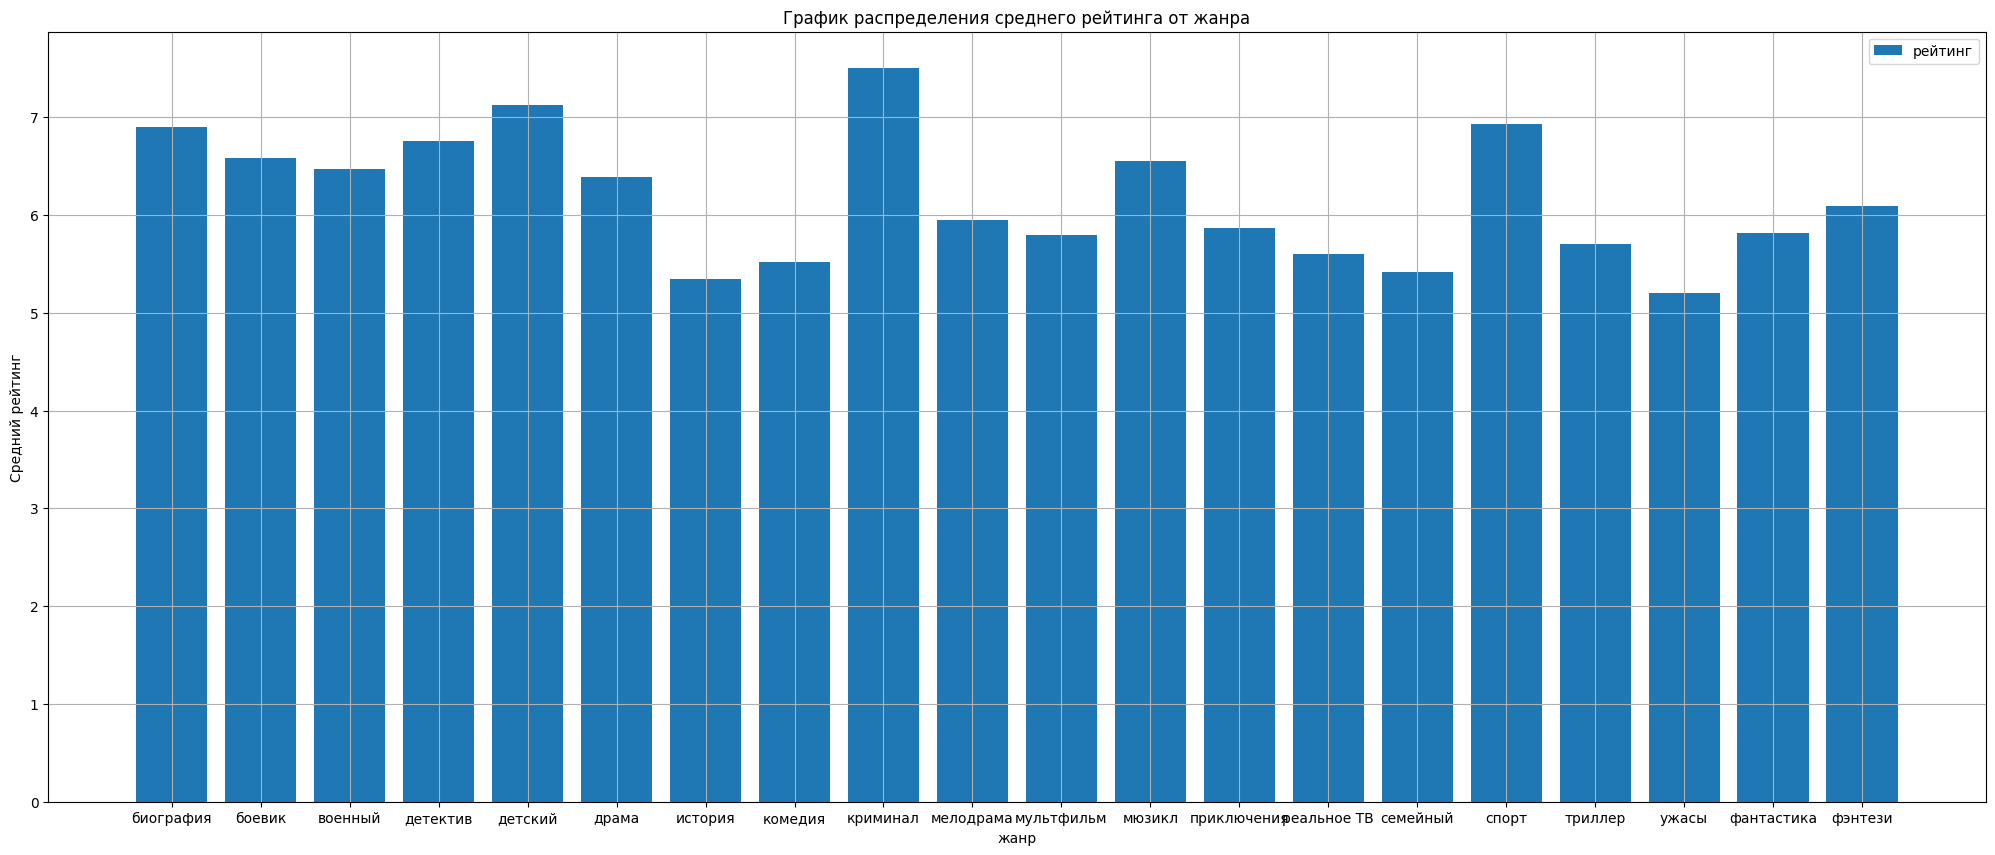

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(genre_rating['genre_1'], genre_rating['ratings'], label="рейтинг")
fig.set_figwidth(25)
fig.set_figheight(10)
ax.grid(which='major')
ax.set_title('График распределения среднего рейтинга от жанра')
ax.set_xlabel('жанр');
ax.set_ylabel('Средний рейтинг')
plt.legend();

Итак, наибольший средний рейтинг 7,5 у жанра криминал, далее 7,2 - у детского, около 7 - у спорта, и меньше всего 5,2 -ужасы.

[к содержанию](#enter)

<a id='conclusion'></a>
### Общие выводы

* Таким образом, кинокомпаниям из госбюджета с 2013 по 2019 годы было выделено 20201 млн. 
* От общего бюджета фильма доля поддержки может составлять от 4,4 до 78,5 %.
* С точки зрения полноты информации наиболее информативные годы - 2015-2019г. Для них общий кассовый сбор составляет 234021 млн.руб., при этом максимальный сбор 49668 млн.руб. в 2018 году, минимальный - 39497 млн.руб. в 2015 году.
* По возрастным категориям наибольшие сборы у фильмов 16+ - 76034 млн., наименьшие - в категории 0+ - 809 млн.
* Окупаемость не зависит ни от бюджета, ни от величины государственной поддержки. Фильмы с наибольшей государственной поддержкой имеют рейтинг 5,5-6,2. Максимальная окупаемость у фильмов с рейтингом 6,8 - 3750 млн, самые убыточные фильмы имеют рейтинг 5,8. Самый окупаемый жанр - комедия, самый убыточный - приключения. Жанр наиболее спонсируемый государством - драма. Высший средний рейтинг у жанра криминал.